In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
from matplotlib import pylab as plb
%matplotlib inline

In [17]:
df=pd.read_csv('SeoulBikeData.csv')
#df.info()
df.columns
df.isnull().sum()
df = df[df['Hour']==12]

In [18]:
df.drop(columns=['Hour','Holiday','Seasons'],inplace=True)

In [19]:
adults=pd.read_csv('adult.data',names=cols)

In [20]:
adults.loc[adults.income==' >50K']

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
cols=['age','workclass','fnlwgt','education','education_number','marital_status','occupation','relationship','race','sex',
     'capital_gain','capital_loss','hours_per_week','native_country','income']

In [21]:
adults['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [22]:
adults.income = (adults.income==' >50K').astype('int')

In [23]:
adults.income.unique()

array([0, 1])

In [24]:
adults_d=adults.iloc[:,[3,-1]]
adults_d.income.describe()

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
x=adults_d['education'].to_numpy().reshape(-1,1)
y=adults_d['income'].to_numpy().reshape(-1,1)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [2]:
iris=pd.read_csv('Iris.csv')
# iris.Species=(iris['Species']=='Iris-setosa').astype('int')
# iris.Species.unique()

In [3]:
iris=iris.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
#iris.drop('Id',axis=1,inplace=True)

In [4]:
train,validation,test=np.split(iris.sample(frac=1),[int(.6*len(iris)),int(.8*len(iris))])

In [5]:
iris.Species.unique()

array([0, 1, 2], dtype=int64)

In [6]:
def scaler_ds(ds):
    x = ds[ds.columns[:-1]].values
    y = ds[ds.columns[-1]].values
           
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
           
    data=np.hstack((x,np.reshape(y,(-1,1))))
    
    return data, x, y

In [10]:
train,x_train,y_train=scaler_ds(train)
validation,x_valid,y_valid=scaler_ds(validation)
test,x_test,y_test=scaler_ds(test)

In [11]:
# Training
kN=KNeighborsClassifier(n_neighbors=5)
kN.fit(x_train,y_train)

# Testing
y_pred=kN.predict(x_test)

# Validation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
# Training
nb=GaussianNB()
nb=nb.fit(x_train,y_train)

# Testing
y_pred=nb.predict(x_test)

# Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
from sklearn.svm import SVC

In [15]:
# Training
svm = SVC()
svm = svm.fit(x_train,y_train)

# Testing
y_pred = svm.predict(x_test)

#Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Training
lg=LogisticRegression()
lg=lg.fit(x_train,y_train)

# Testing
y_pred = lg.predict(x_test)

# Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [19]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(5,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=.2, verbose=0
  )

    return nn_model, history

In [20]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [21]:
x_train.shape

(90, 5)

In [22]:
import tensorflow as tf

16 nodes, dropout 0, lr 0.01, batch size 32


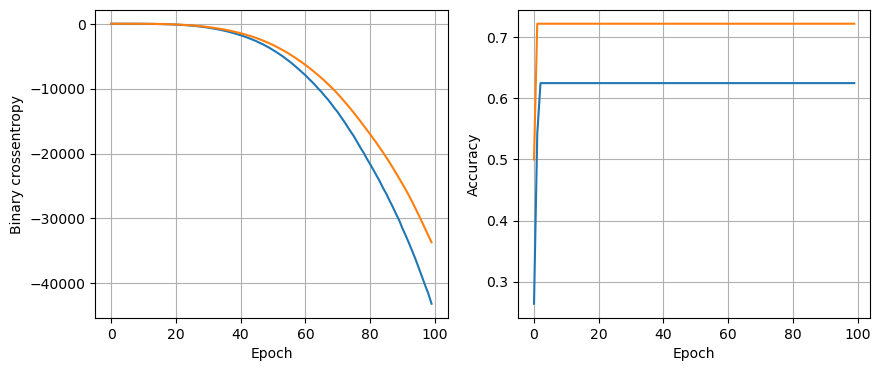

1/1 [==============================] - 0s 38ms/step - loss: -31606.3574 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.01, batch size 64


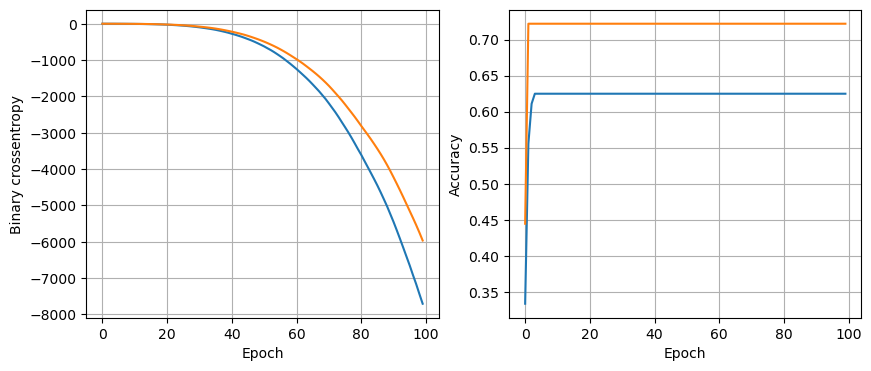

1/1 [==============================] - 0s 41ms/step - loss: -5699.9678 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.01, batch size 128


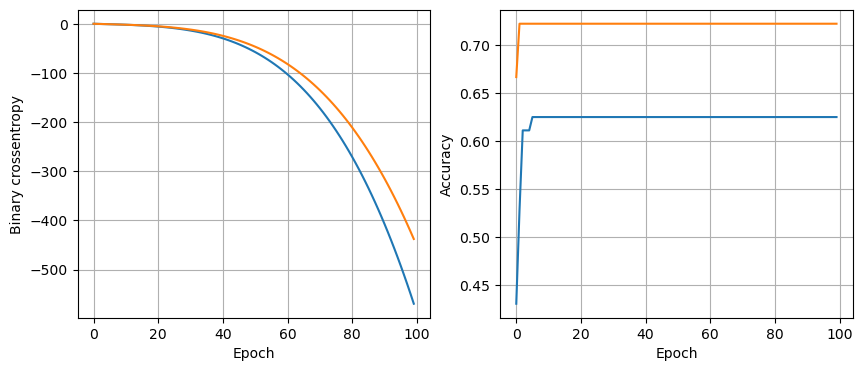

1/1 [==============================] - 0s 38ms/step - loss: -420.5656 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.005, batch size 32


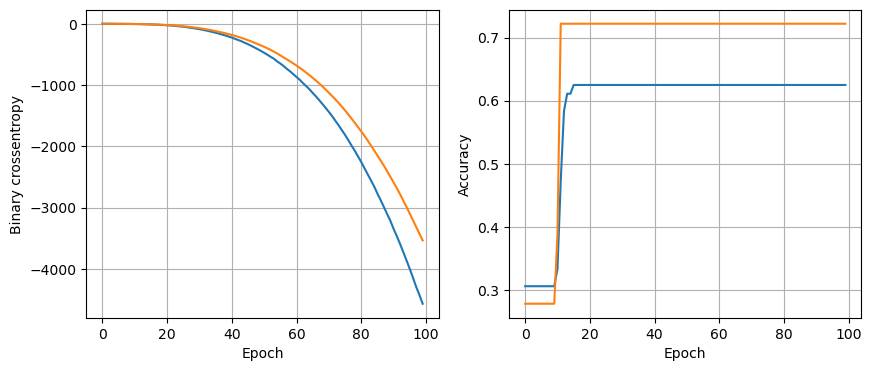

1/1 [==============================] - 0s 40ms/step - loss: -3351.4690 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.005, batch size 64


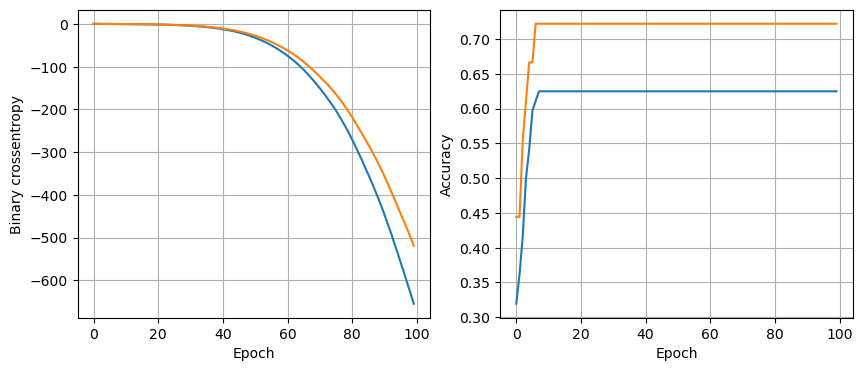

1/1 [==============================] - 0s 38ms/step - loss: -487.6183 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.005, batch size 128


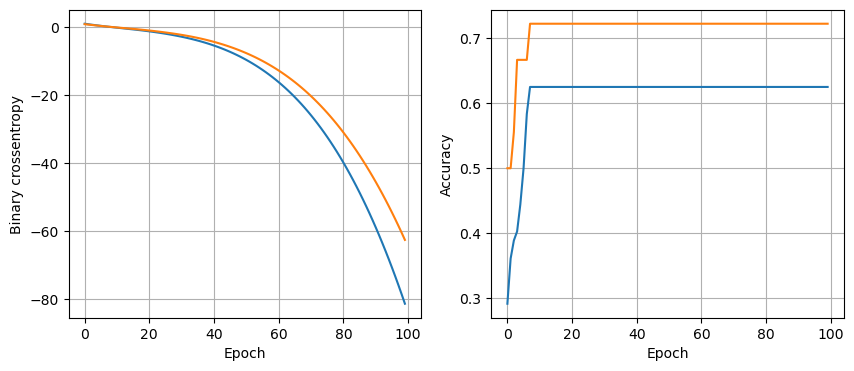

1/1 [==============================] - 0s 39ms/step - loss: -60.2539 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.001, batch size 32


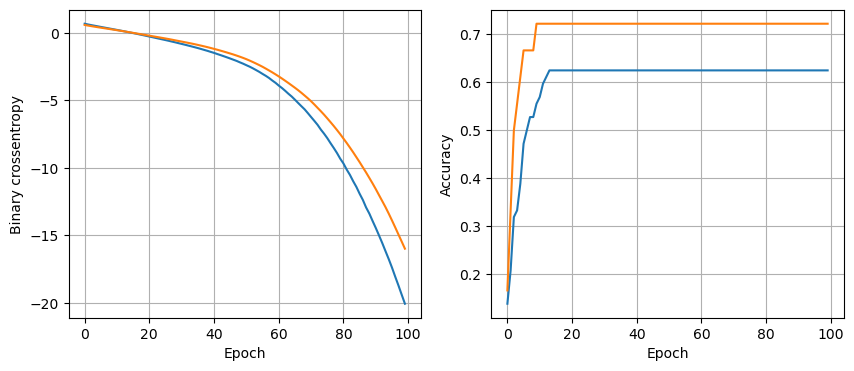

1/1 [==============================] - 0s 38ms/step - loss: -14.7938 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.001, batch size 64


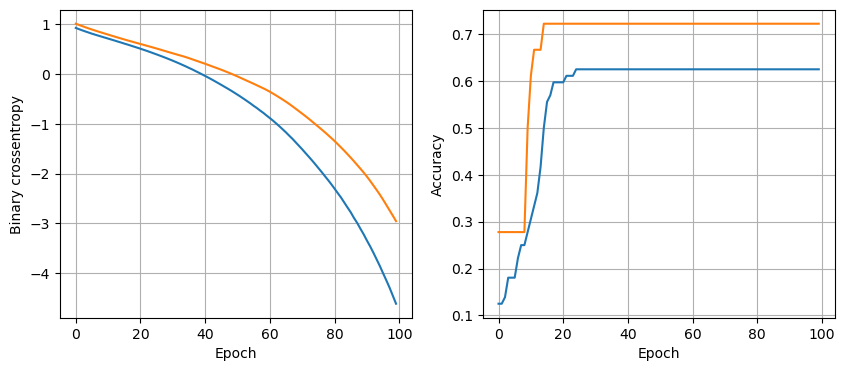

1/1 [==============================] - 0s 39ms/step - loss: -3.2389 - accuracy: 0.7667
16 nodes, dropout 0, lr 0.001, batch size 128


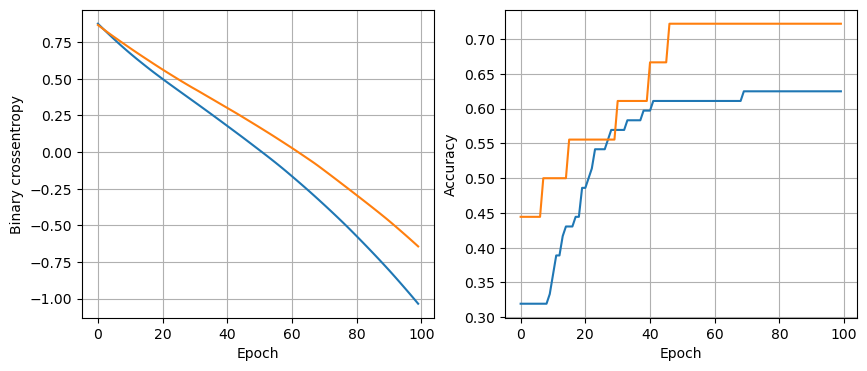

1/1 [==============================] - 0s 40ms/step - loss: -0.6917 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.01, batch size 32


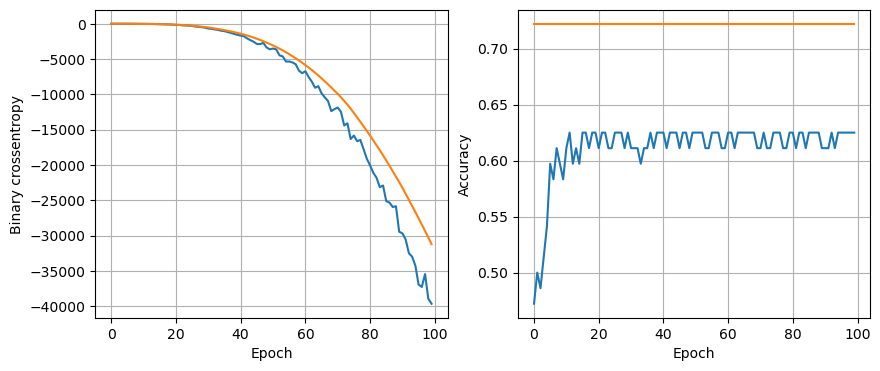

1/1 [==============================] - 0s 41ms/step - loss: -29270.1074 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.01, batch size 64


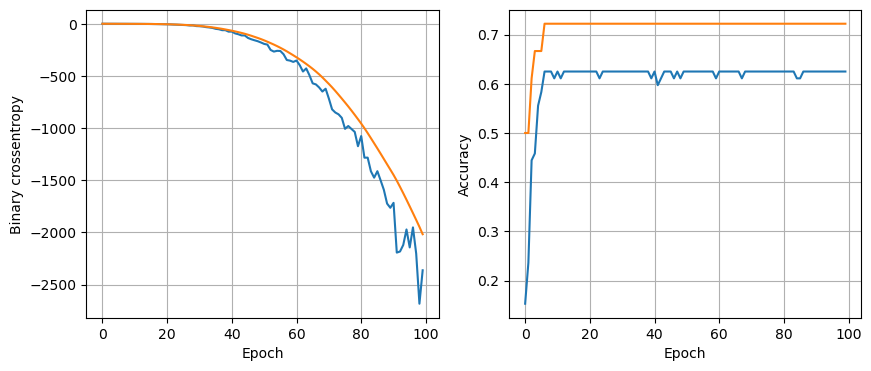

1/1 [==============================] - 0s 45ms/step - loss: -1885.6147 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.01, batch size 128


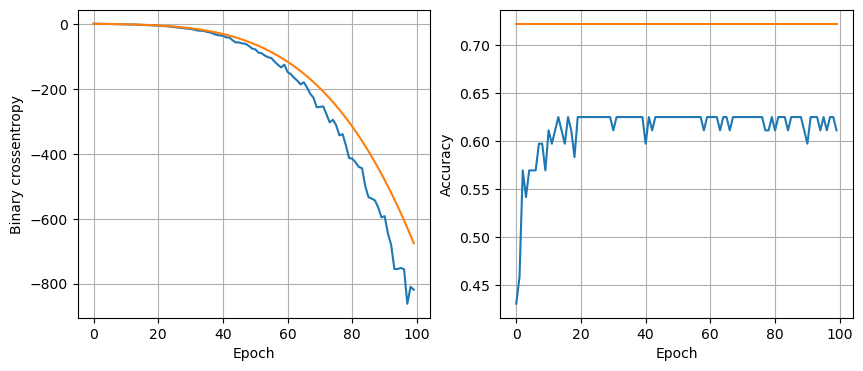

1/1 [==============================] - 0s 37ms/step - loss: -650.7160 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.005, batch size 32


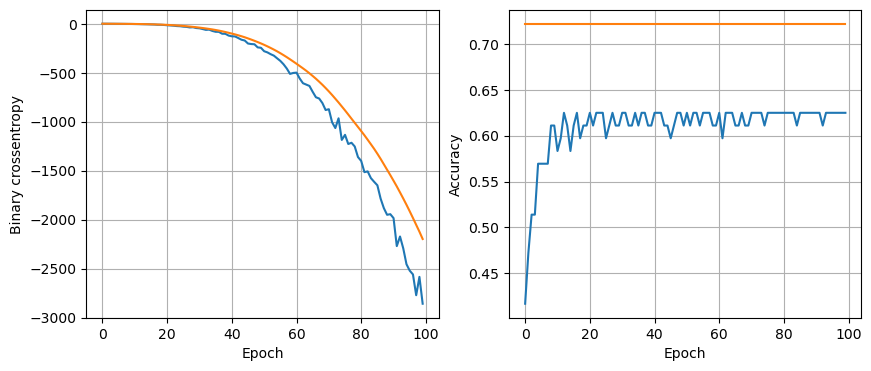

1/1 [==============================] - 0s 38ms/step - loss: -2091.4722 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.005, batch size 64


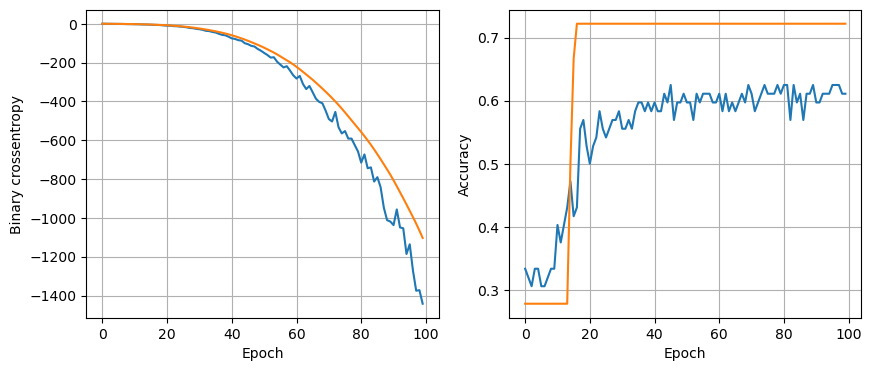

1/1 [==============================] - 0s 37ms/step - loss: -1029.0674 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.005, batch size 128


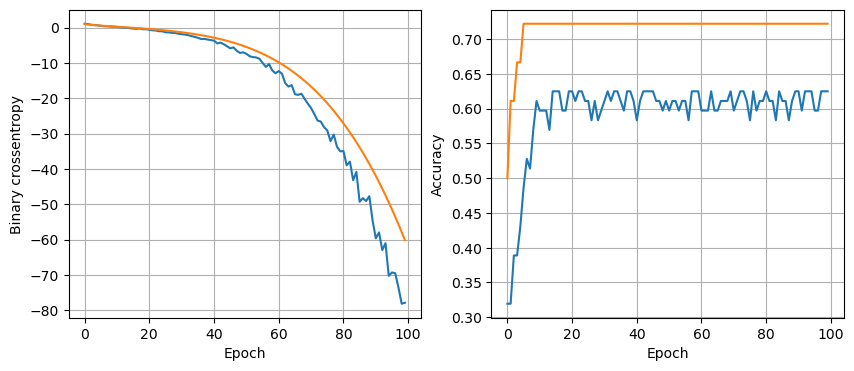

1/1 [==============================] - 0s 38ms/step - loss: -59.4932 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.001, batch size 32


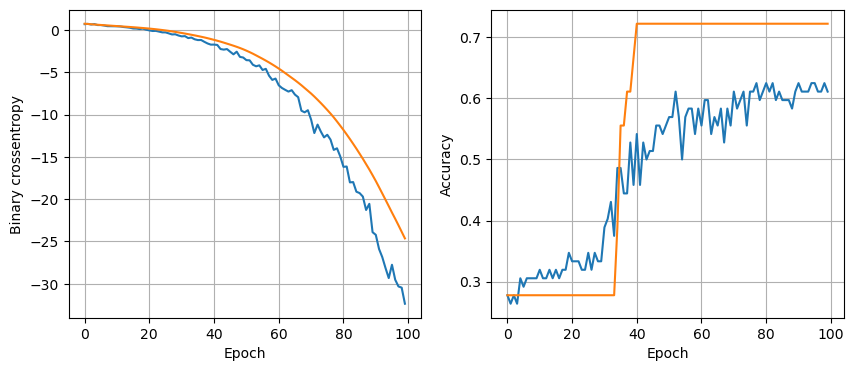

1/1 [==============================] - 0s 39ms/step - loss: -23.9555 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.001, batch size 64


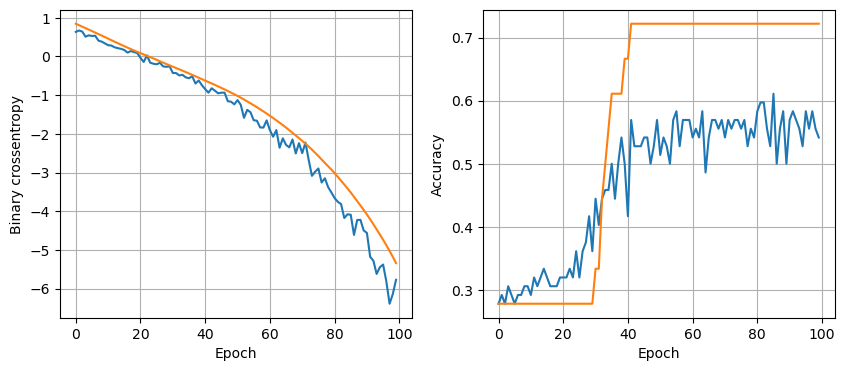

1/1 [==============================] - 0s 39ms/step - loss: -4.6875 - accuracy: 0.7667
16 nodes, dropout 0.2, lr 0.001, batch size 128


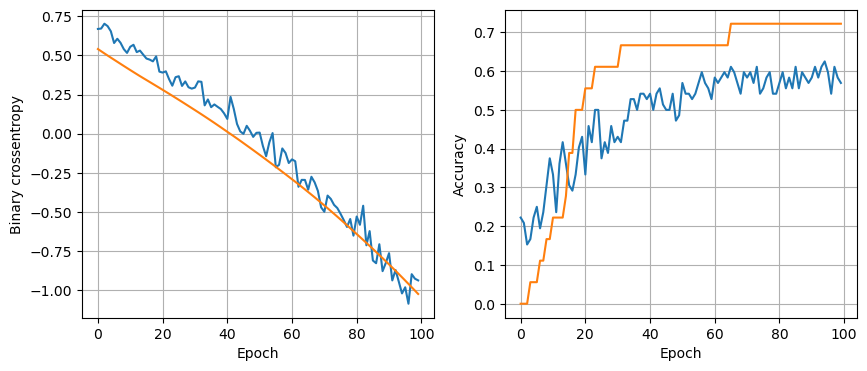

1/1 [==============================] - 0s 48ms/step - loss: -0.7801 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.01, batch size 32


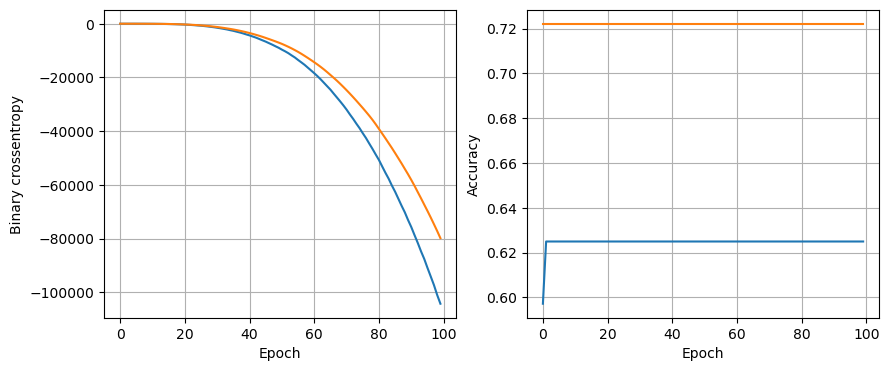

1/1 [==============================] - 0s 39ms/step - loss: -76394.9453 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.01, batch size 64


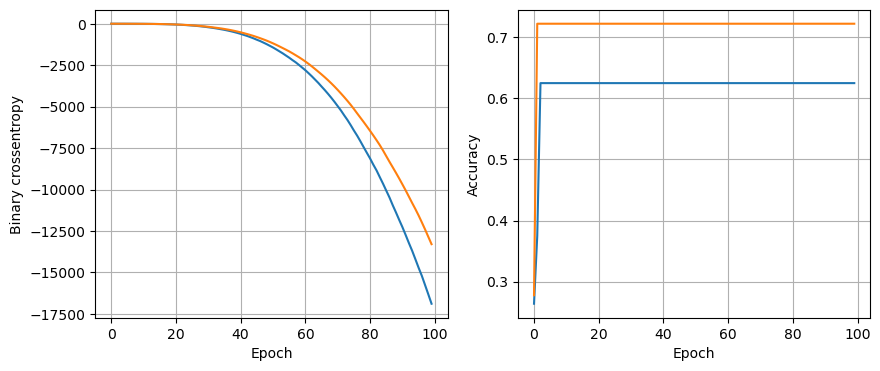

1/1 [==============================] - 0s 39ms/step - loss: -12505.4043 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.01, batch size 128


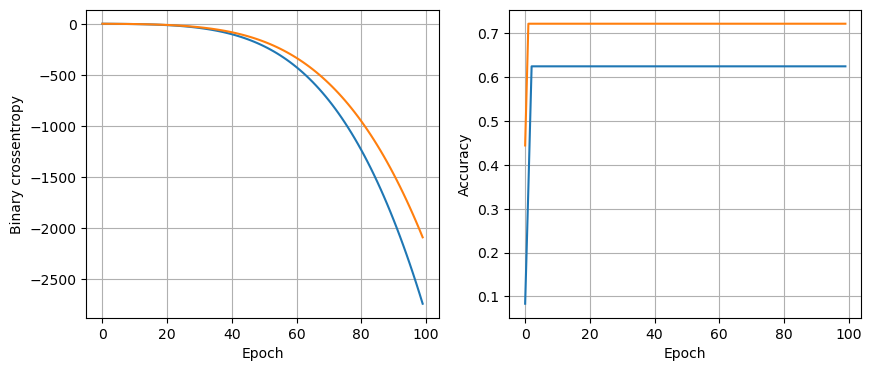

1/1 [==============================] - 0s 39ms/step - loss: -2027.3932 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.005, batch size 32


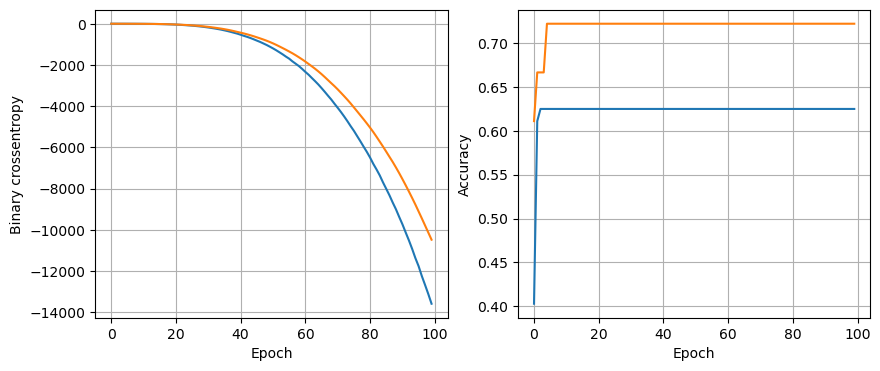

1/1 [==============================] - 0s 40ms/step - loss: -9958.2246 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.005, batch size 64


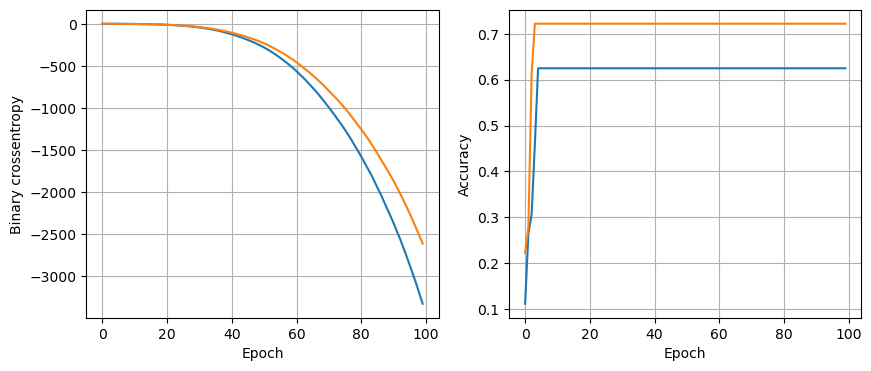

1/1 [==============================] - 0s 39ms/step - loss: -2465.1392 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.005, batch size 128


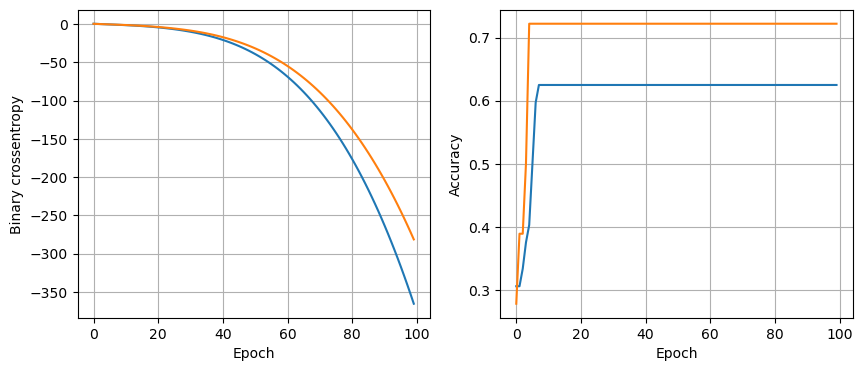

1/1 [==============================] - 0s 39ms/step - loss: -270.4185 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.001, batch size 32


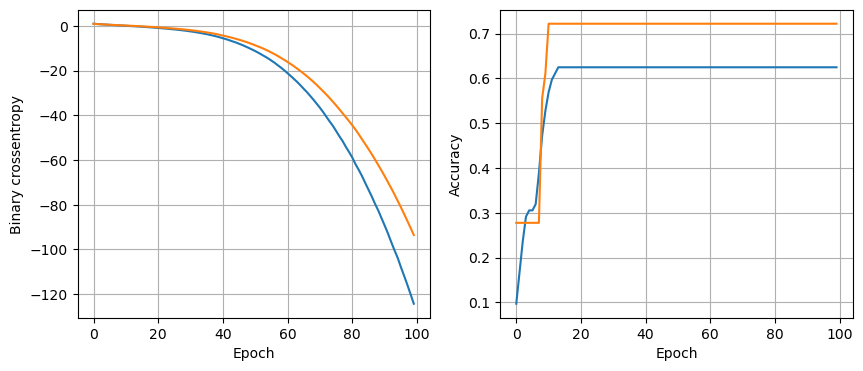

1/1 [==============================] - 0s 39ms/step - loss: -91.4553 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.001, batch size 64


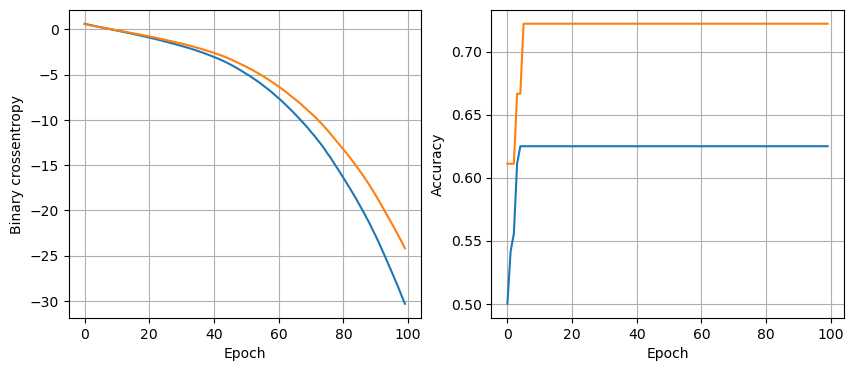

1/1 [==============================] - 0s 39ms/step - loss: -22.4135 - accuracy: 0.7667
32 nodes, dropout 0, lr 0.001, batch size 128


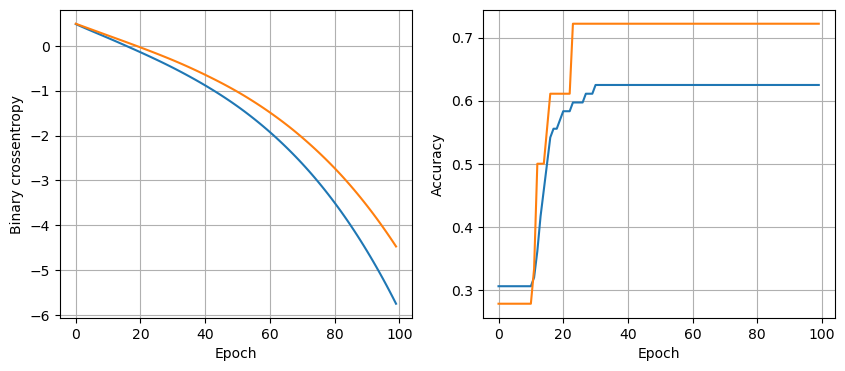

1/1 [==============================] - 0s 38ms/step - loss: -4.2090 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.01, batch size 32


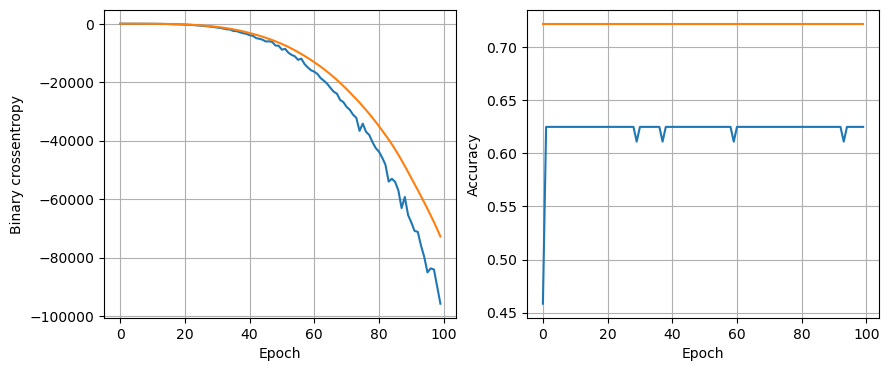

1/1 [==============================] - 0s 39ms/step - loss: -68678.9375 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.01, batch size 64


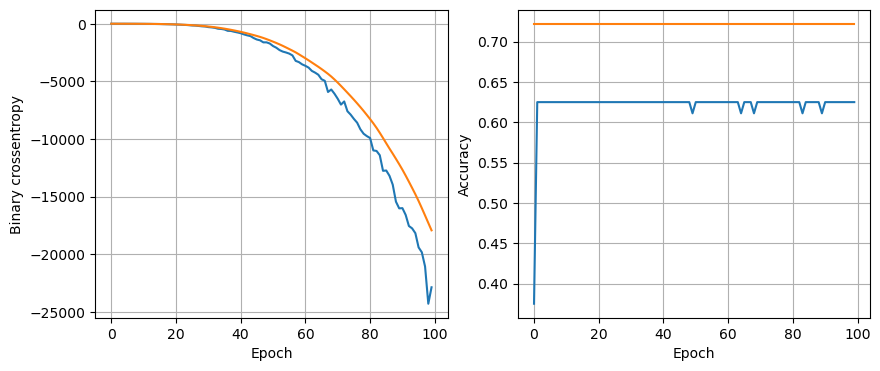

1/1 [==============================] - 0s 39ms/step - loss: -16890.8711 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.01, batch size 128


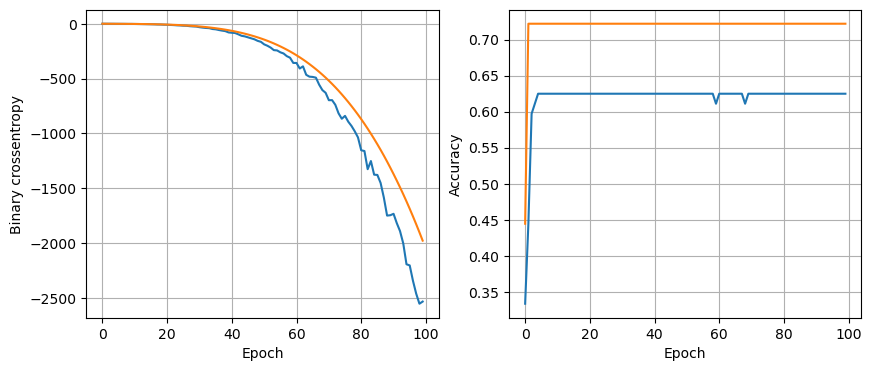

1/1 [==============================] - 0s 52ms/step - loss: -1907.4291 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.005, batch size 32


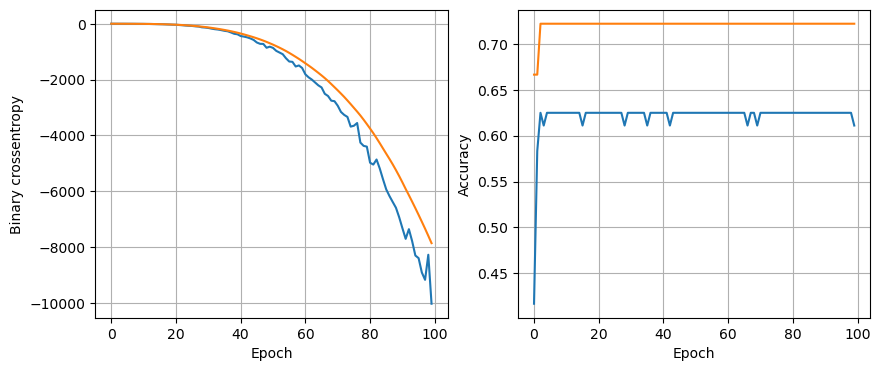

1/1 [==============================] - 0s 40ms/step - loss: -7343.0513 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.005, batch size 64


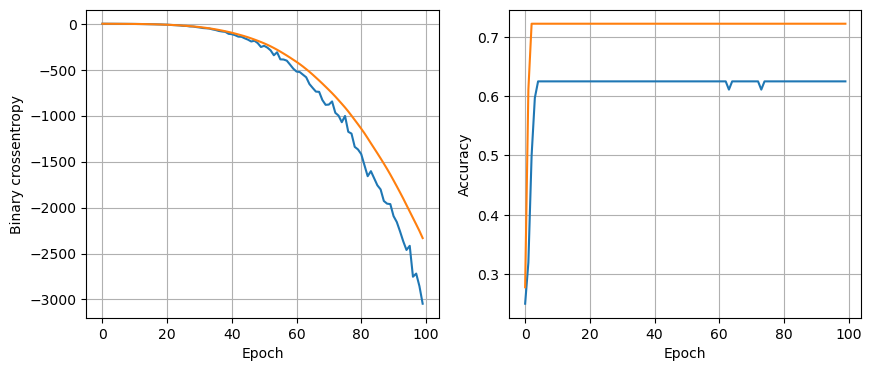

1/1 [==============================] - 0s 40ms/step - loss: -2161.3118 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.005, batch size 128


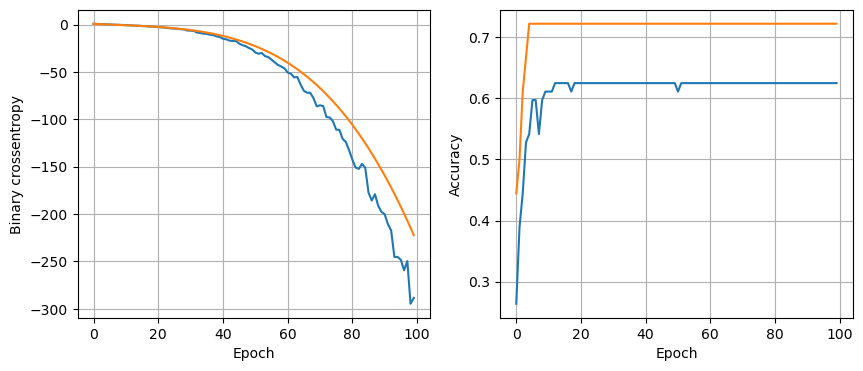

1/1 [==============================] - 0s 40ms/step - loss: -214.7188 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.001, batch size 32


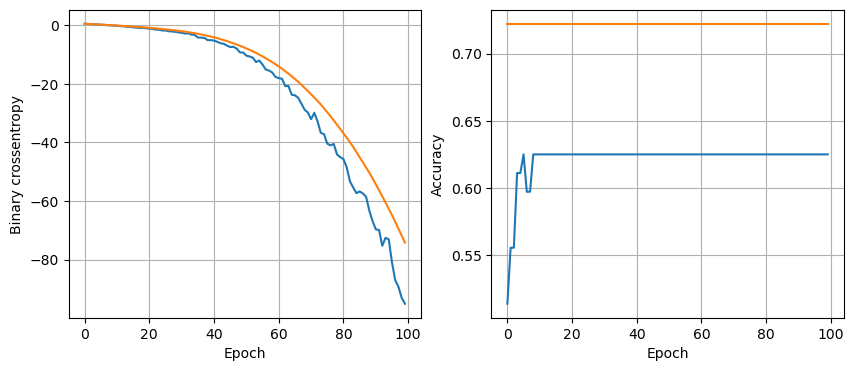

1/1 [==============================] - 0s 38ms/step - loss: -69.8887 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.001, batch size 64


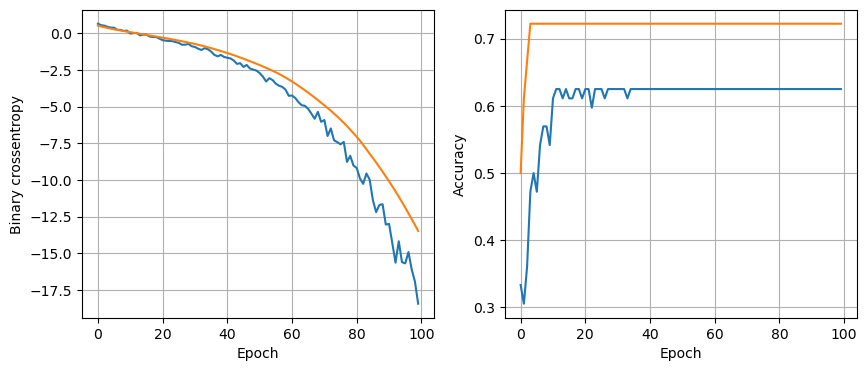

1/1 [==============================] - 0s 38ms/step - loss: -12.9039 - accuracy: 0.7667
32 nodes, dropout 0.2, lr 0.001, batch size 128


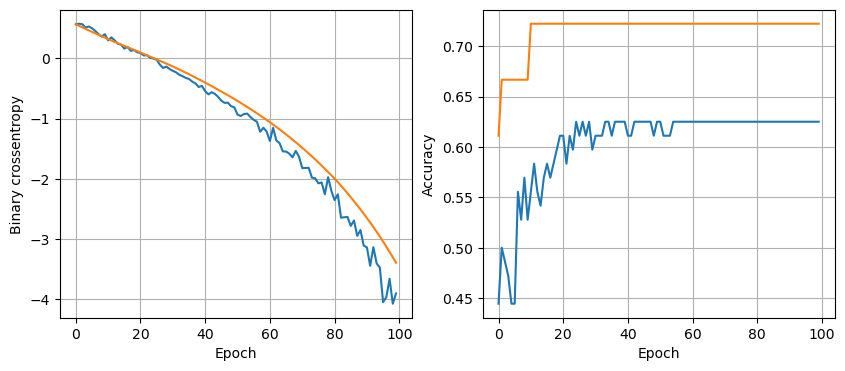

1/1 [==============================] - 0s 39ms/step - loss: -3.0072 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.01, batch size 32


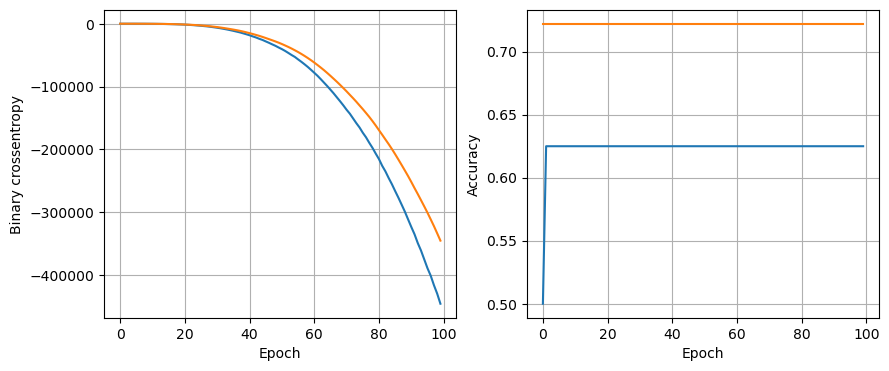

1/1 [==============================] - 0s 39ms/step - loss: -326861.1875 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.01, batch size 64


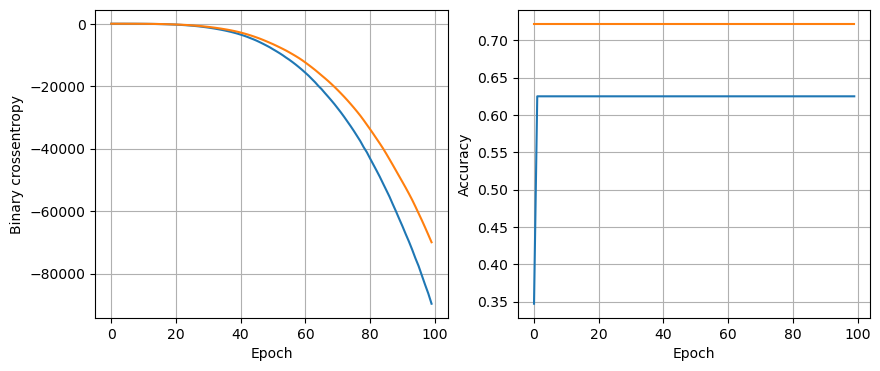

1/1 [==============================] - 0s 38ms/step - loss: -66215.9219 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.01, batch size 128


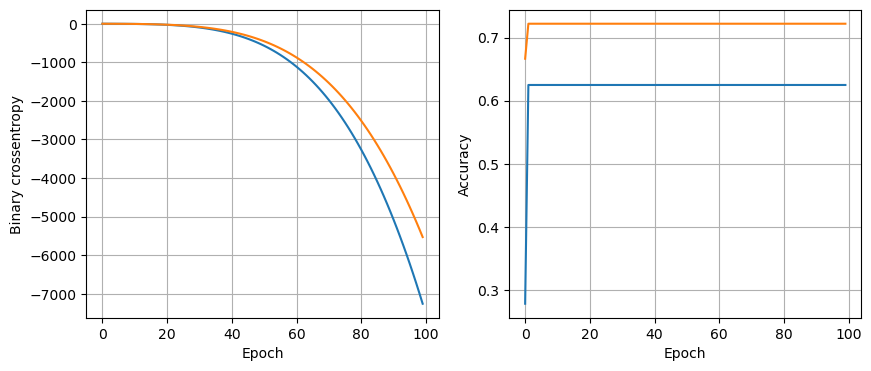

1/1 [==============================] - 0s 47ms/step - loss: -5364.4526 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.005, batch size 32


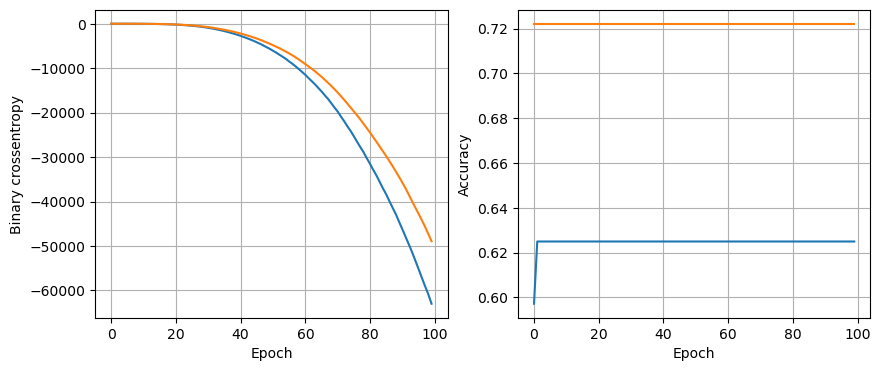

1/1 [==============================] - 0s 39ms/step - loss: -46284.4766 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.005, batch size 64


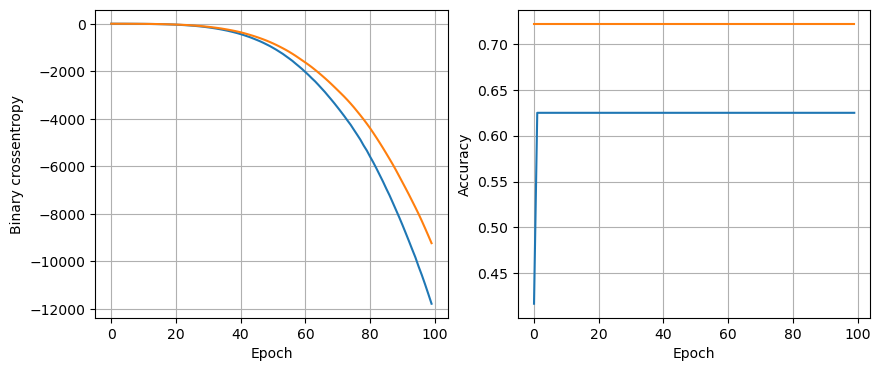

1/1 [==============================] - 0s 39ms/step - loss: -8714.4014 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.005, batch size 128


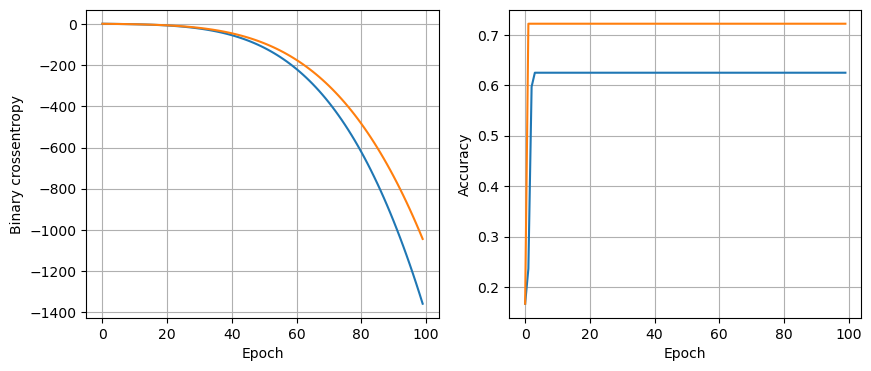

1/1 [==============================] - 0s 37ms/step - loss: -1005.0750 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.001, batch size 32


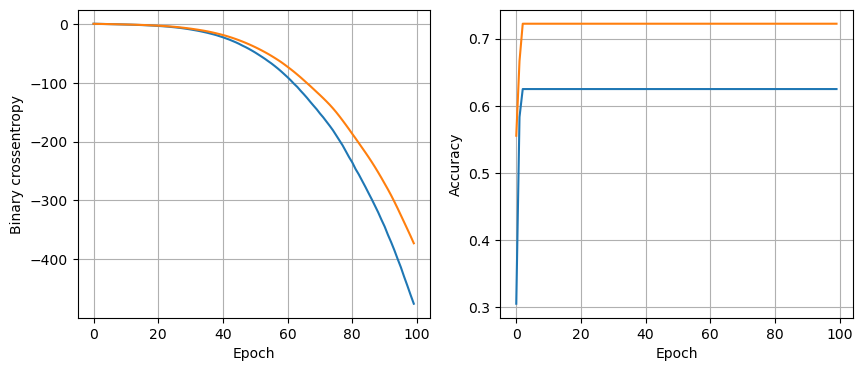

1/1 [==============================] - 0s 41ms/step - loss: -349.8737 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.001, batch size 64


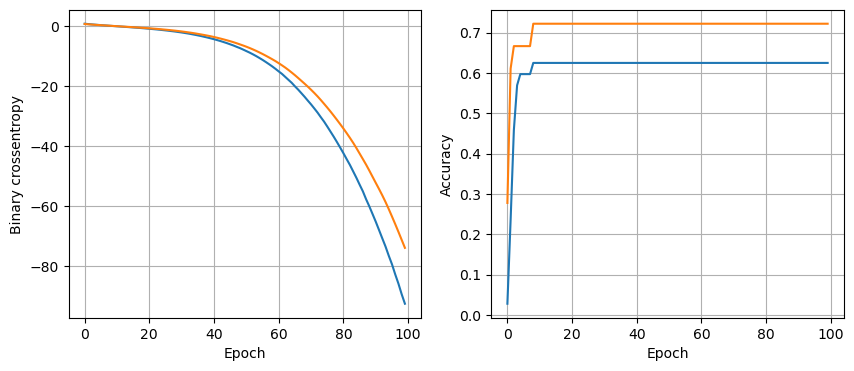

1/1 [==============================] - 0s 37ms/step - loss: -68.8151 - accuracy: 0.7667
64 nodes, dropout 0, lr 0.001, batch size 128


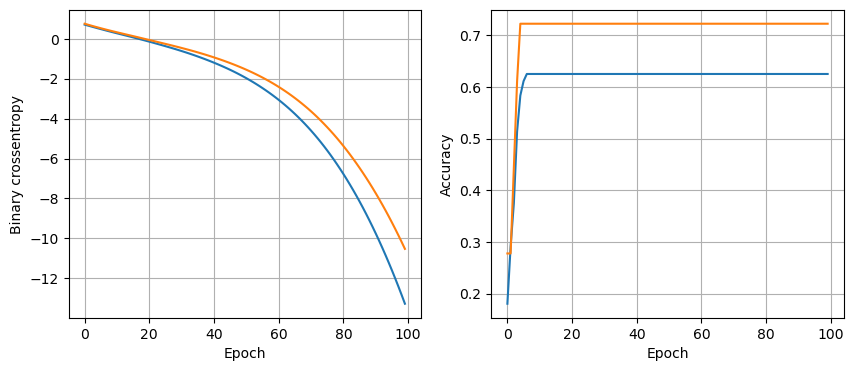

1/1 [==============================] - 0s 38ms/step - loss: -9.8683 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.01, batch size 32


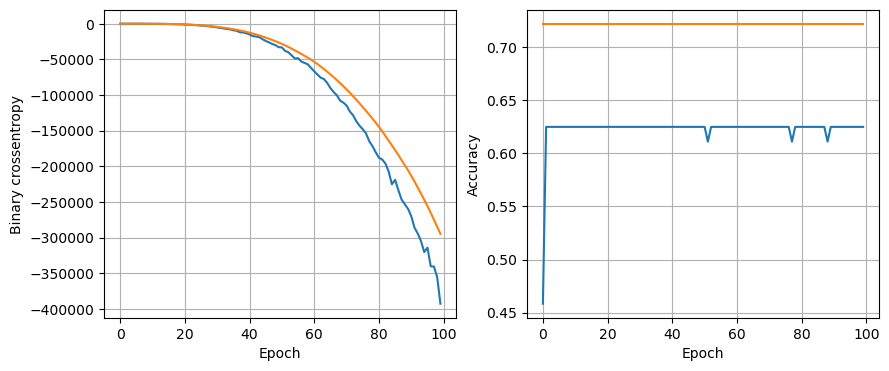

1/1 [==============================] - 0s 41ms/step - loss: -276613.3750 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.01, batch size 64


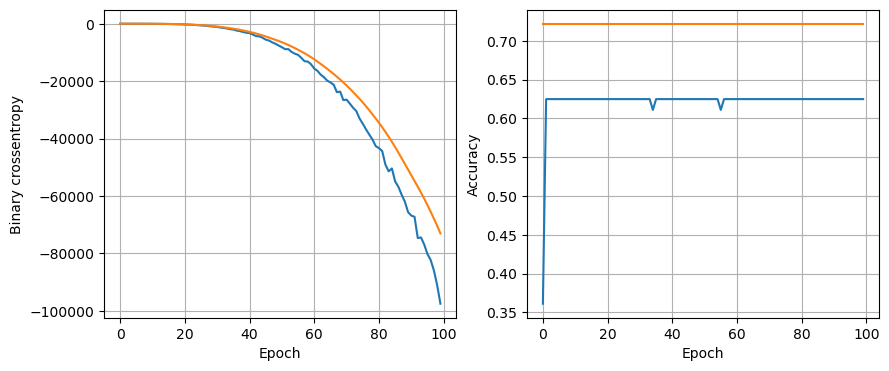

1/1 [==============================] - 0s 39ms/step - loss: -69054.7656 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.01, batch size 128


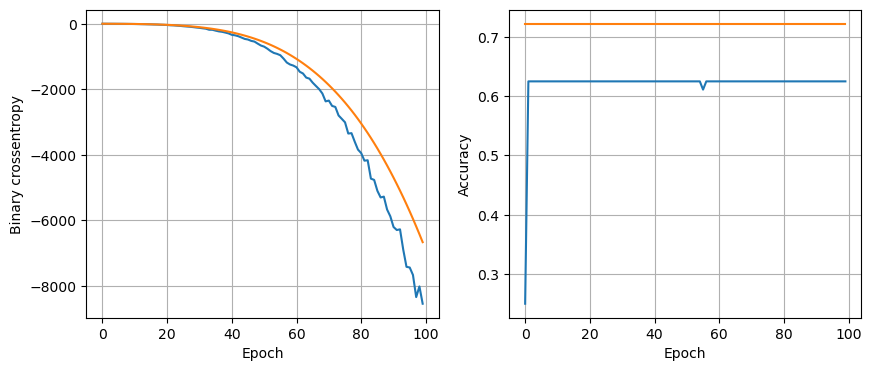

1/1 [==============================] - 0s 49ms/step - loss: -6446.4888 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.005, batch size 32


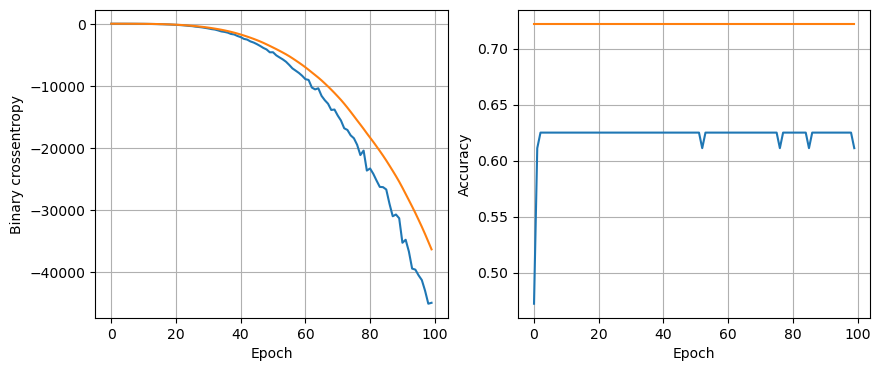

1/1 [==============================] - 0s 39ms/step - loss: -34361.5547 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.005, batch size 64


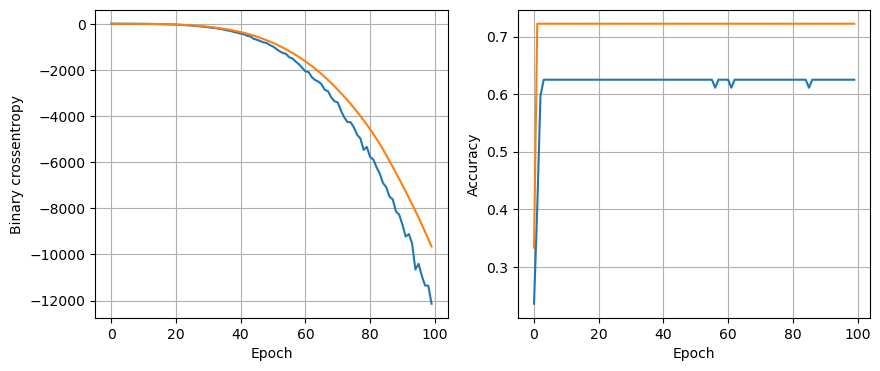

1/1 [==============================] - 0s 39ms/step - loss: -9084.7334 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.005, batch size 128


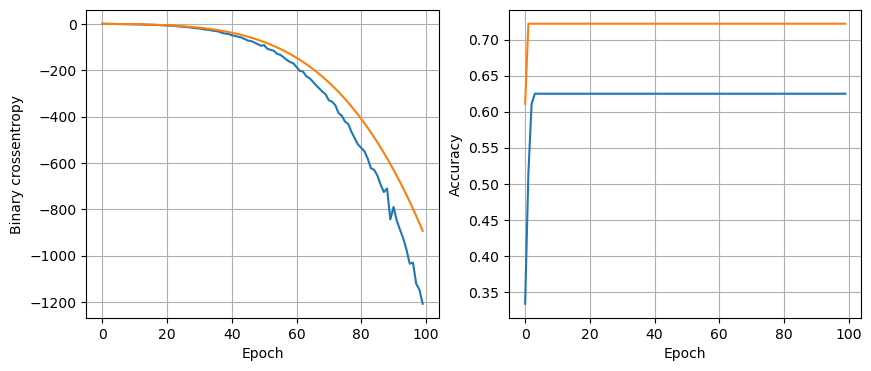

1/1 [==============================] - 0s 39ms/step - loss: -866.7501 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.001, batch size 32


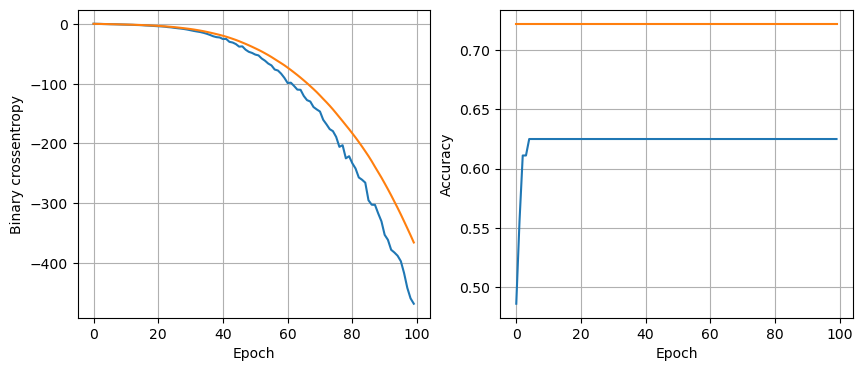

1/1 [==============================] - 0s 61ms/step - loss: -347.2408 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.001, batch size 64


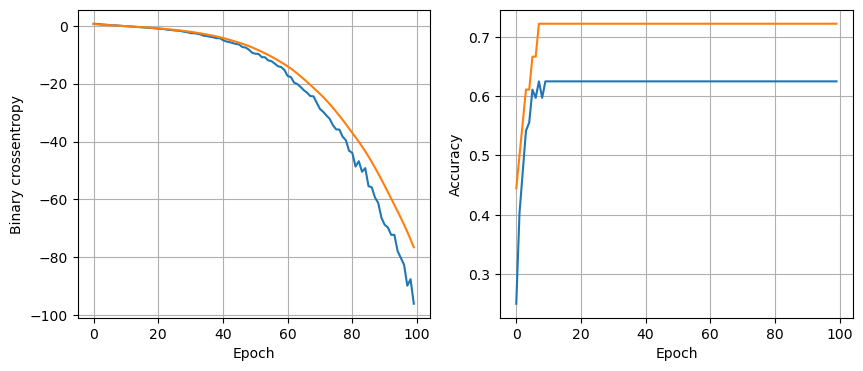

1/1 [==============================] - 0s 60ms/step - loss: -69.8235 - accuracy: 0.7667
64 nodes, dropout 0.2, lr 0.001, batch size 128


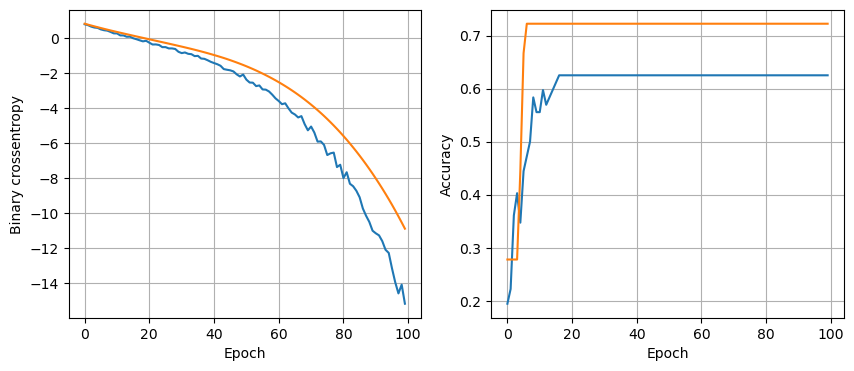

1/1 [==============================] - 0s 60ms/step - loss: -10.9018 - accuracy: 0.7667


In [23]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                        least_val_loss = val_loss
                        least_loss_model = model

In [24]:
y_pred = least_loss_model.predict(x_test)
# y_pred = (y_pred>.5).astype('int').reshape(-1,)
# print(classification_report(y_test,y_pred))

1/1 [==============================] - 2s 2s/step


In [27]:
y_pred

array([[1.0000000e+00],
       [1.0000000e+00],
       [2.1373280e-10],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.1794152e-10],
       [9.8705100e-10],
       [1.0000000e+00],
       [3.3733242e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.2462788e-10],
       [1.1796327e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.8496662e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.6737636e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.2745698e-11]], dtype=float32)

In [26]:
for i in y_pred:
    

SyntaxError: incomplete input (1660900317.py, line 2)

In [70]:
for i in y_pred:
    for y in i:
        if y<=0:
            y=0
        elif y>0 and i<1.5:
            y=1
        else:
            y=2

In [83]:
y_pred = (y_pred>.5).astype('int').reshape(-1,)

In [28]:
y_pred.reshape(-1,)

array([1.0000000e+00, 1.0000000e+00, 2.1373280e-10, 1.0000000e+00,
       1.0000000e+00, 1.1794152e-10, 9.8705100e-10, 1.0000000e+00,
       3.3733242e-11, 1.0000000e+00, 1.0000000e+00, 1.2462788e-10,
       1.1796327e-02, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 9.8496662e-11, 1.0000000e+00,
       1.0000000e+00, 6.6737636e-11, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 7.2745698e-11], dtype=float32)

In [29]:
for i in y_pred:
    for y in i:
        y=round(y)
        print(y)

1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0


In [84]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1])

In [30]:
for i in y_pred:
    print(i)

[1.]
[1.]
[2.137328e-10]
[1.]
[1.]
[1.1794152e-10]
[9.87051e-10]
[1.]
[3.3733242e-11]
[1.]
[1.]
[1.2462788e-10]
[0.01179633]
[1.]
[1.]
[1.]
[1.]
[1.]
[9.849666e-11]
[1.]
[1.]
[6.6737636e-11]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[7.27457e-11]


In [31]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64